In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('winequality-white.csv',sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<Axes: >

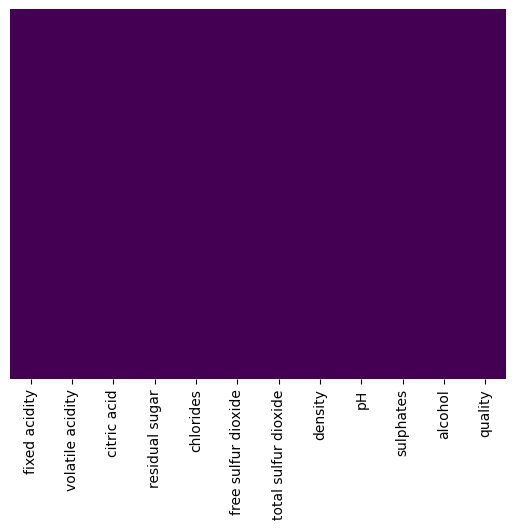

In [15]:
sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')

#### NO NULL VALUES

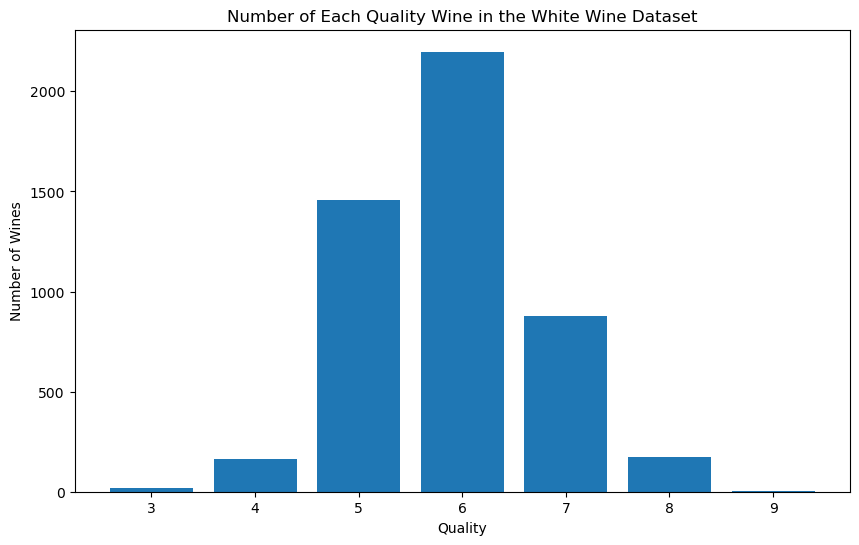

In [17]:
plt.figure(figsize=(10, 6))
plt.bar(df['quality'].value_counts().index, df['quality'].value_counts().values)
plt.xlabel('Quality')
plt.ylabel('Number of Wines')
plt.title('Number of Each Quality Wine in the White Wine Dataset')
plt.show()

In [35]:
quality_mapping = {0:'lowest' , 1: 'Poor', 2: 'Okay', 3: 'Average', 4: 'Above average', 5: 'Good' , 6:'Better' , 7:'Nice' , 8:'Best',9:'Excellent',10:'Perfect'}
df['quality_mapped'] = df['quality'].map(quality_mapping)

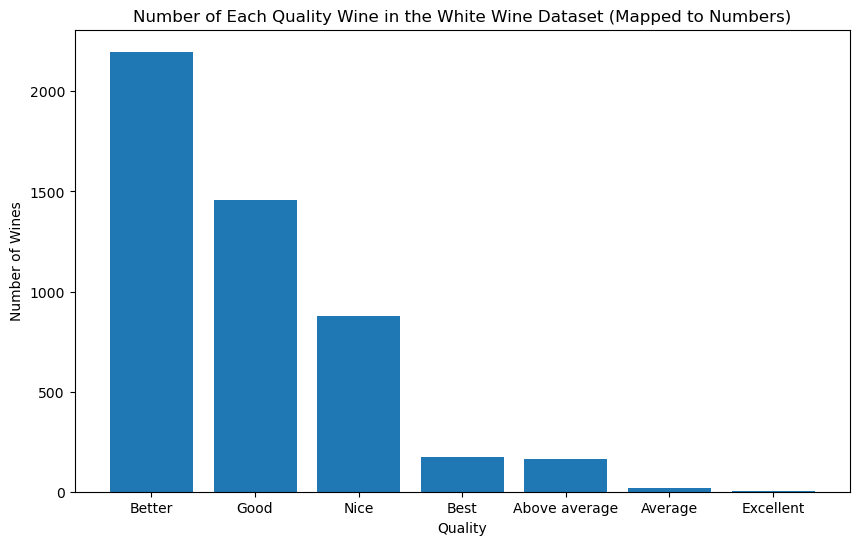

In [36]:
plt.figure(figsize=(10, 6))
plt.bar(df['quality_mapped'].value_counts().index, df['quality_mapped'].value_counts().values)
plt.xlabel('Quality')
plt.ylabel('Number of Wines')
plt.title('Number of Each Quality Wine in the White Wine Dataset (Mapped to Numbers)')
plt.show()

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz

X = df.drop(['quality', 'quality_mapped'], axis=1)  # Features
y = df['quality_mapped']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

id3_tree = DecisionTreeClassifier(criterion='entropy')
id3_tree.fit(X_train, y_train)

dot_data_id3 = tree.export_graphviz(id3_tree, out_file=None, feature_names=X.columns, class_names=id3_tree.classes_, filled=True, rounded=True, special_characters=True)
graph_id3 = graphviz.Source(dot_data_id3)
graph_id3.render('id3_tree', format='png', cleanup=True)

cart_tree = DecisionTreeClassifier(criterion='gini')
cart_tree.fit(X_train, y_train)

dot_data_cart = tree.export_graphviz(cart_tree, out_file=None, feature_names=X.columns, class_names=cart_tree.classes_, filled=True, rounded=True, special_characters=True)
graph_cart = graphviz.Source(dot_data_cart)
graph_cart.render('cart_tree', format='png', cleanup=True)


ModuleNotFoundError: No module named 'graphviz'

In [29]:
pip install graphviz

  Obtaining dependency information for graphviz from https://files.pythonhosted.org/packages/de/5e/fcbb22c68208d39edff467809d06c9d81d7d27426460ebc598e55130c1aa/graphviz-0.20.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/47.0 kB ? eta -:--:--
   ---------------------------------------- 47.0/47.0 kB 2.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz

X = df.drop(['quality', 'quality_mapped'], axis=1)  # Features
y = df['quality_mapped']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

id3_tree = DecisionTreeClassifier(criterion='entropy')
id3_tree.fit(X_train, y_train)

dot_data_id3 = tree.export_graphviz(id3_tree, out_file=None, feature_names=X.columns, class_names=id3_tree.classes_, filled=True, rounded=True, special_characters=True)
graph_id3 = graphviz.Source(dot_data_id3)
graph_id3.render('id3_tree', format='png', cleanup=True)

cart_tree = DecisionTreeClassifier(criterion='gini')
cart_tree.fit(X_train, y_train)

dot_data_cart = tree.export_graphviz(cart_tree, out_file=None, feature_names=X.columns, class_names=cart_tree.classes_, filled=True, rounded=True, special_characters=True)
graph_cart = graphviz.Source(dot_data_cart)
graph_cart.render('cart_tree', format='png', cleanup=True)


ValueError: Input contains NaN

In [31]:
df.fillna(df.mean(), inplace=True)  # Fill missing values with the mean of each column

quality_mapping = {'Poor': 1, 'Okay': 2, 'Average': 3, 'Above average': 4, 'Good': 5}
df['quality_mapped'] = df['quality'].map(quality_mapping)

X = df.drop(['quality', 'quality_mapped'], axis=1)  # Features
y = df['quality_mapped']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

id3_tree = DecisionTreeClassifier(criterion='entropy')
id3_tree.fit(X_train, y_train)

TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [32]:
x=df
y=x['quality']
x.drop(['quality'],axis=1)
print(y)

0       6
1       6
2       6
3       6
4       6
       ..
4893    6
4894    5
4895    6
4896    7
4897    6
Name: quality, Length: 4898, dtype: int64


In [37]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_mapped
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,Better
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,Better
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,Better
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,Better
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,Better


In [38]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
quality_mapped          0
dtype: int64

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz

y = df['quality_mapped']
X = df.drop(['quality', 'quality_mapped'], axis=1)  
  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

id3_tree = DecisionTreeClassifier(criterion='entropy')
id3_tree.fit(X_train, y_train)



DecisionTreeClassifier(criterion='entropy')

In [47]:
cart = DecisionTreeClassifier(criterion='gini')
cart.fit(X_train, y_train)



DecisionTreeClassifier()

In [48]:
from sklearn.metrics import accuracy_score

In [49]:
y_pred=id3_tree.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)

In [50]:
accuracy

0.6081632653061224

In [52]:
y_pred=cart.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)

In [53]:
accuracy

0.6122448979591837

In [59]:
X1 = df.drop(['quality', 'quality_mapped'], axis=1)  
y1 = df['quality_mapped']  

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

id3_tree = DecisionTreeClassifier(criterion='entropy')
id3_tree = id3_tree.fit(X1_train, y1_train)


X2 = df.drop(['quality', 'quality_mapped'], axis=1)  
y2 = df['quality_mapped']  

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=42)

cart = DecisionTreeClassifier(criterion='gini')
cart = cart.fit(X2_train, y2_train)

In [60]:
y1_pred=id3_tree.predict(X1_test)
accuracy=accuracy_score(y1_test,y1_pred)
accuracy

0.5918367346938775

In [61]:
y2_pred=cart.predict(X2_test)
accuracy=accuracy_score(y2_test,y2_pred)
accuracy

0.5897959183673469

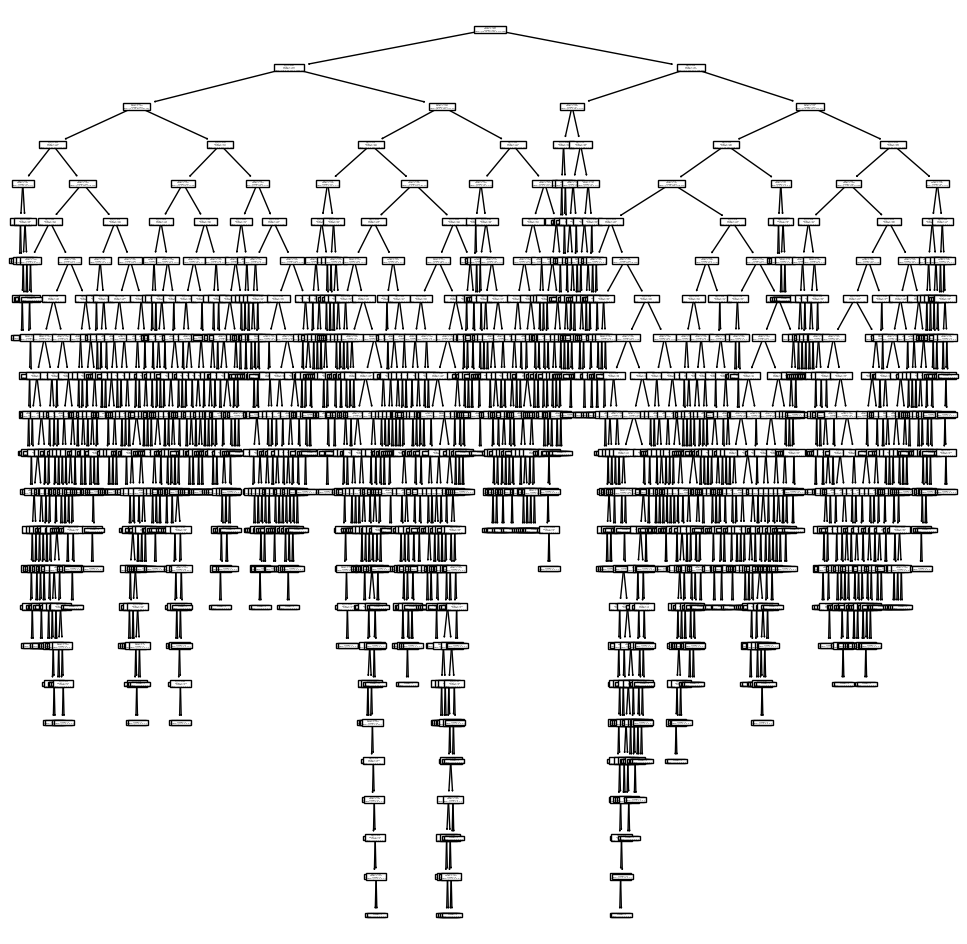

In [62]:
from sklearn import tree
fig,ax=plt.subplots(figsize=(12,12))
tree.plot_tree(id3_tree,ax=ax)
plt.show()

In [63]:
df = pd.read_csv('winequality-white.csv',sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [64]:
quality_mapping = {0:'lowest' , 1: 'Poor', 2: 'Okay', 3: 'Average', 4: 'Above average', 5: 'Good' , 6:'Better' , 7:'Nice' , 8:'Best',9:'Excellent',10:'Perfect'}
df['quality_mapped'] = df['quality'].map(quality_mapping)

In [65]:
X1 = df.drop(['quality', 'quality_mapped'], axis=1)  
y1 = df['quality_mapped']  

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

id3_tree = DecisionTreeClassifier(criterion='entropy')
id3_tree = id3_tree.fit(X1_train, y1_train)


X2 = df.drop(['quality', 'quality_mapped'], axis=1)  
y2 = df['quality_mapped']  

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=42)

cart = DecisionTreeClassifier(criterion='gini')
cart = cart.fit(X2_train, y2_train)

In [66]:
y1_pred=id3_tree.predict(X1_test)
accuracy=accuracy_score(y1_test,y1_pred)
accuracy

0.5979591836734693

In [67]:
y2_pred=cart.predict(X2_test)
accuracy=accuracy_score(y2_test,y2_pred)
accuracy

0.5877551020408164

0.5877551020408164

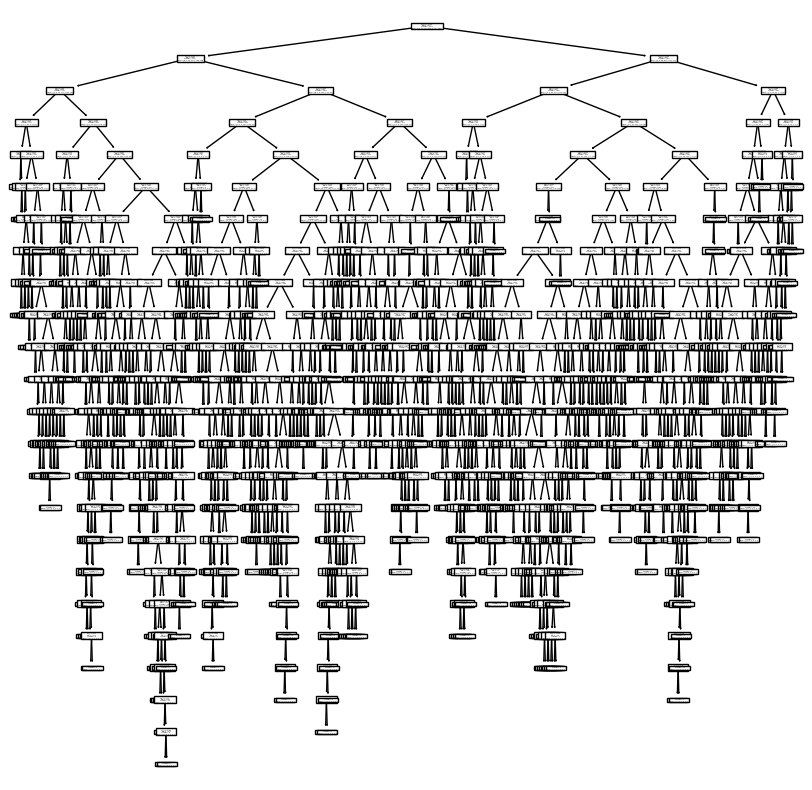

In [71]:
fig,ax=plt.subplots(figsize=(10,10))
tree.plot_tree(cart,ax=ax)
plt.show()

In [73]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y1_test,y1_pred)
cm

array([[  9,   1,   1,   3,   0,   8,   3],
       [  0,   0,   0,   3,   0,   1,   1],
       [  0,   0,  17,   9,   0,   0,   9],
       [ 10,   0,  13, 273,   0,  79,  57],
       [  0,   0,   0,   0,   0,   0,   0],
       [ 10,   0,   5,  88,   0, 173,  15],
       [  2,   2,  15,  50,   2,   7, 114]], dtype=int64)

In [74]:
cm=confusion_matrix(y2_test,y2_pred)
cm

array([[ 11,   1,   1,   9,  16,   2],
       [  1,   0,   0,   3,   2,   1],
       [  0,   0,  24,  11,   3,  11],
       [ 15,   2,  17, 413, 114, 107],
       [ 15,   0,   3, 117, 267,  24],
       [  3,   1,   9,  99,  19, 149]], dtype=int64)